In [1]:
#IMPORTING NECESSARY LIBRARIES
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import scipy
from scipy import stats
import random
    

In [2]:
#data 
df = pd.read_csv('C:/Users/shubh/Documents/City_day_Delhi.csv')
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Delhi,01-01-2015,313.22,607.98,69.16,36.39,110.59,33.85,15.20,9.25,41.68,14.36,24.86,9.84,472.0,Severe
1,Delhi,02-01-2015,186.18,269.55,62.09,32.87,88.14,31.83,9.54,6.65,29.97,10.55,20.09,4.29,454.0,Severe
2,Delhi,03-01-2015,87.18,131.90,25.73,30.31,47.95,69.55,10.61,2.65,19.71,3.91,10.23,1.99,143.0,Moderate
3,Delhi,04-01-2015,151.84,241.84,25.01,36.91,48.62,130.36,11.54,4.63,25.36,4.26,9.71,3.34,319.0,Very Poor
4,Delhi,05-01-2015,146.60,219.13,14.01,34.92,38.25,122.88,9.20,3.33,23.20,2.80,6.21,2.96,325.0,Very Poor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2004,Delhi,27-06-2020,39.80,155.94,10.88,21.46,22.47,31.43,0.87,10.38,18.88,1.69,19.99,0.43,112.0,Moderate
2005,Delhi,28-06-2020,59.52,308.65,12.67,21.60,23.86,29.27,0.94,10.70,18.05,1.71,25.13,1.74,196.0,Moderate
2006,Delhi,29-06-2020,44.86,184.12,10.50,21.57,21.94,27.97,0.88,11.58,26.61,2.13,23.80,1.13,233.0,Poor
2007,Delhi,30-06-2020,39.80,91.98,5.99,17.96,15.44,28.48,0.84,10.51,37.29,1.57,16.37,0.49,114.0,Moderate


In [3]:
#checking for null values
df.isnull().sum()

City            0
Date            0
PM2.5           2
PM10           77
NO              2
NO2             2
NOx             0
NH3             9
CO             84
SO2           110
O3             84
Benzene         0
Toluene         0
Xylene        781
AQI            10
AQI_Bucket     10
dtype: int64

In [4]:
#replace null values with mean value for the month in which value was missing. This is because pollutants vary month wise.
def fill_na(x,y):
    array = x
    array2 = y
    array3 = np.isnan(array)
    for i in range (0,len(array)-1):
      if (array3[i,0] == True ): 
         for j in range (0,len(array2)):
             if(array[i,1] == array2[j,1]):
                 array[i,0] = array2[j,0]
    return(array)

In [5]:
df['Date'] = pd.to_datetime(df['Date'],dayfirst=True) # convert date to values of the date
df['month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df['day']  = df['Date'].dt.day
lst = df.columns
lst = lst[2:15]
mean_df = df.groupby('month')[lst].mean()
mean_df['month'] = mean_df.index
mean_df



,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,month
month,,,,,,,,,,,,,,
1,197.485430,306.653871,53.992581,57.017957,68.085591,58.074624,3.056774,15.068011,49.730538,5.199516,19.973065,1.559040,360.387097,1
2,141.975529,246.009588,45.856118,55.475353,66.981706,47.406353,2.908235,15.890176,48.829824,4.036765,15.424000,2.403097,298.829412,2
3,87.573871,182.341739,32.110323,43.957957,49.663817,35.398804,2.524516,16.667957,44.452796,3.159140,13.418495,1.959355,222.623656,3
4,90.932222,222.045227,32.598222,49.427056,51.825222,35.551180,2.140444,21.733352,53.524581,3.282722,13.318500,1.067083,248.444444,4
5,92.209946,238.978098,28.725161,51.855269,52.960699,37.813548,2.313387,20.669409,62.751828,2.959731,13.867903,0.456064,258.693548,5
6,69.810111,194.179887,20.014000,45.313500,40.031222,40.094722,1.498535,11.229936,55.887962,2.355722,11.795833,1.007556,199.418994,6
7,46.417628,119.895703,18.163846,34.843846,48.292500,37.189615,1.319760,9.603200,41.731840,1.850577,12.668654,1.035079,137.574194,7
8,43.102026,114.451935,22.486797,36.097516,50.378968,31.123487,1.206320,9.388560,42.209841,1.745419,13.722194,0.889687,134.442177,8
9,55.345000,135.992067,23.202267,36.635133,42.509467,29.783716,0.960933,10.936560,44.448067,1.991667,14.148733,1.366082,157.426667,9


In [6]:
#all null values filled with mean of that month because of seasonal nature of Pollutants.
for i in range(2,15):
 ar =  fill_na(df.iloc[:,[i,16]].values , mean_df.iloc[:,[(i-2),13]].values)
 df.iloc[:,[i]] = ar[0:2009,0]




In [7]:
(df.corr().loc['AQI']).sort_values(ascending = False).T  #parameters which effect AQI

AQI        1.000000
PM2.5      0.882488
PM10       0.880811
Benzene    0.671568
NO2        0.662152
NO         0.641184
NOx        0.558112
NH3        0.520989
SO2        0.440930
O3         0.327293
Toluene    0.282681
CO         0.253443
Xylene     0.201847
month      0.053530
day       -0.045910
Year      -0.282881
Name: AQI, dtype: float64

In [8]:
df.groupby('AQI_Bucket')['AQI'].max() # seeing upperlimt for various categories

AQI_Bucket
Good             50.0
Moderate        200.0
Poor            300.0
Satisfactory    100.0
Severe          716.0
Very Poor       400.0
Name: AQI, dtype: float64

In [9]:
start_date = '01-01-2016'
end_date = '31-12-2019'
lst = []
mask = (df['Date'] > start_date) & (df['Date'] <= end_date) 
lst = mask
Year_15_19 = df.loc[mask]
Year_15_19= Year_15_19.loc[(Year_15_19['month'] == 4) |(Year_15_19['month'] == 5)| (Year_15_19['month'] == 6)]
# filtering data from 2015-2019 to compare it with 2020 values


In [10]:
start_date = '01-01-2020'
end_date = '31-12-2020'
lst = []
mask = (df['Date'] > start_date) & (df['Date'] <= end_date) 
lst = mask

Year_2020 = df.loc[mask]
Year_2020 = Year_2020.loc[(Year_2020['month'] == 4) |(Year_2020['month'] == 5)| (Year_2020['month'] == 6)]
Year_2020 # we have data only till june 2020

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,month,Year,day
1917,Delhi,2020-04-01,32.88,65.84,10.40,19.17,19.26,26.73,0.62,13.00,35.06,1.12,9.17,3.01,80.0,Satisfactory,4,2020,1
1918,Delhi,2020-04-02,28.51,61.06,9.91,17.18,17.72,22.22,0.60,10.84,39.47,0.91,7.85,0.97,78.0,Satisfactory,4,2020,2
1919,Delhi,2020-04-03,31.36,62.69,9.29,20.07,19.33,21.54,0.61,11.99,46.82,1.13,8.60,0.77,84.0,Satisfactory,4,2020,3
1920,Delhi,2020-04-04,40.79,77.64,10.07,22.38,21.19,23.06,0.68,12.59,41.26,1.30,9.64,0.89,90.0,Satisfactory,4,2020,4
1921,Delhi,2020-04-05,51.79,96.88,10.99,24.42,22.78,25.14,0.81,16.03,44.55,1.74,12.38,0.26,103.0,Moderate,4,2020,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2003,Delhi,2020-06-26,50.01,112.08,9.67,22.06,21.75,32.64,1.01,11.66,24.82,2.07,23.31,0.70,104.0,Moderate,6,2020,26
2004,Delhi,2020-06-27,39.80,155.94,10.88,21.46,22.47,31.43,0.87,10.38,18.88,1.69,19.99,0.43,112.0,Moderate,6,2020,27
2005,Delhi,2020-06-28,59.52,308.65,12.67,21.60,23.86,29.27,0.94,10.70,18.05,1.71,25.13,1.74,196.0,Moderate,6,2020,28
2006,Delhi,2020-06-29,44.86,184.12,10.50,21.57,21.94,27.97,0.88,11.58,26.61,2.13,23.80,1.13,233.0,Poor,6,2020,29


In [11]:
Polluted_df = ((df.loc[(df['AQI_Bucket'] == 'Severe' ) | (df['AQI_Bucket'] == 'Very Poor' ) ] ))
Polluted_df
good_df = ((df.loc[(df['AQI_Bucket'] == 'Good' ) | (df['AQI_Bucket'] == 'Satisfactory' ) ] ))

In [12]:

#Polluted_df
good_2020 = ((Year_2020.loc[(Year_2020['AQI_Bucket'] == 'Good' ) | (Year_2020['AQI_Bucket'] == 'Satisfactory' ) ] ))
good_15_19 = ((Year_15_19.loc[(Year_15_19['AQI_Bucket'] == 'Good' ) | (Year_15_19['AQI_Bucket'] == 'Satisfactory' ) ] ))

In [13]:
Polluted_df.to_excel('Severly Polluted Days 2015-2020.xlsx')

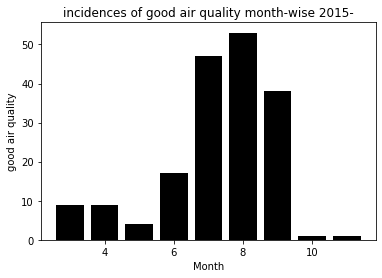

In [14]:
hist = (good_df.groupby('month')['NOx'].count())
#hist['month'] = hist.index
plt.bar(hist.index, hist, color ='black',
        width = .8)
plt.xlabel("Month")
plt.ylabel("good air quality")
plt.title("incidences of good air quality month-wise 2015-")
plt.savefig('Good AQI Days 2015-20')
plt.show()

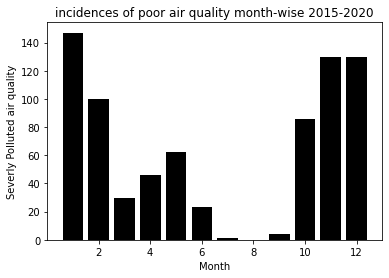

In [15]:
hist2 = Polluted_df.groupby('month')['NOx'].count() #NOx key pollutant from transportation
#hist['month'] = hist.index
plt.bar(hist2.index, hist2, color ='black',
        width = .8)
plt.xlabel("Month")
plt.ylabel("Severly Polluted air quality")
plt.title("incidences of poor air quality month-wise 2015-2020")

plt.savefig('Severly Polluted Days 2015-20')

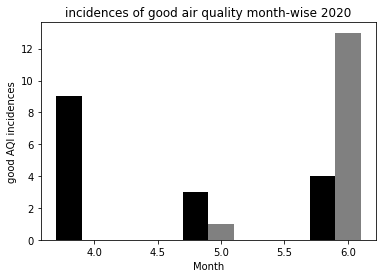

In [16]:
hist = good_2020.groupby('month')['AQI'].count()
hist2 = good_15_19.groupby('month')['AQI'].count()
#hist2 = hist/5
plt.bar(hist.index-.2, hist, color ='black',
        width = .2)
plt.bar(hist2.index, hist2, color ='grey',
        width = .2)
plt.xlabel("Month")
plt.ylabel("good AQI incidences")
plt.title("incidences of good air quality month-wise 2020")
plt.show()

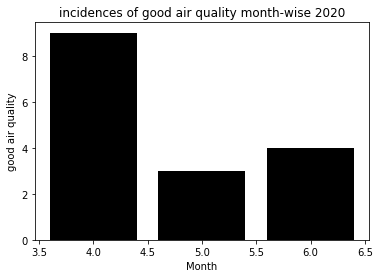

In [17]:
hist = good_2020.groupby('month')['AQI'].count()
#hist['month'] = hist.index

plt.bar(hist.index, hist, color ='black',
        width = .8)
plt.xlabel("Month")
plt.ylabel("good air quality")
plt.title("incidences of good air quality month-wise 2020")
plt.show()

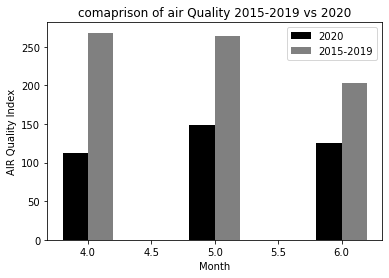

In [18]:
#plotting AQI 2020 vs 2015-2019
hist = Year_2020.groupby('month')['AQI'].mean()
hist2 = Year_15_19.groupby('month')['AQI'].mean()
bar = plt.bar(hist.index - 0.1, hist, color ='black',width = .2, label = '2020')
bar1 = plt.bar(hist2.index+.1 , hist2, color ='grey',width = .2,label ='2015-2019')
plt.xlabel("Month")
plt.ylabel("AIR Quality Index")
plt.legend()
plt.title("comaprison of air Quality 2015-2019 vs 2020")
plt.savefig('AQI')


In [19]:
Year_2020.head(20)


,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,month,Year,day
1917,Delhi,2020-04-01,32.88,65.84,10.40,19.17,19.26,26.73,0.62,13.00,35.06,1.12,9.17,3.01,80.0,Satisfactory,4,2020,1
1918,Delhi,2020-04-02,28.51,61.06,9.91,17.18,17.72,22.22,0.60,10.84,39.47,0.91,7.85,0.97,78.0,Satisfactory,4,2020,2
1919,Delhi,2020-04-03,31.36,62.69,9.29,20.07,19.33,21.54,0.61,11.99,46.82,1.13,8.60,0.77,84.0,Satisfactory,4,2020,3
1920,Delhi,2020-04-04,40.79,77.64,10.07,22.38,21.19,23.06,0.68,12.59,41.26,1.30,9.64,0.89,90.0,Satisfactory,4,2020,4
1921,Delhi,2020-04-05,51.79,96.88,10.99,24.42,22.78,25.14,0.81,16.03,44.55,1.74,12.38,0.26,103.0,Moderate,4,2020,5
1922,Delhi,2020-04-06,59.91,114.88,11.05,24.37,22.68,26.41,0.81,15.59,44.16,2.04,12.80,0.24,134.0,Moderate,4,2020,6
1923,Delhi,2020-04-07,33.12,94.02,8.50,19.27,17.38,25.53,0.60,13.46,42.65,1.01,9.13,0.13,100.0,Satisfactory,4,2020,7
1924,Delhi,2020-04-08,29.70,79.04,8.38,18.56,16.51,23.41,0.56,12.85,45.80,0.99,8.24,0.05,91.0,Satisfactory,4,2020,8
1925,Delhi,2020-04-09,36.13,76.32,8.49,21.37,18.16,23.84,0.66,14.20,48.34,1.11,7.52,0.07,89.0,Satisfactory,4,2020,9
1926,Delhi,2020-04-10,57.67,112.93,9.80,27.12,23.30,27.71,0.81,16.32,40.36,1.79,11.45,0.14,111.0,Moderate,4,2020,10


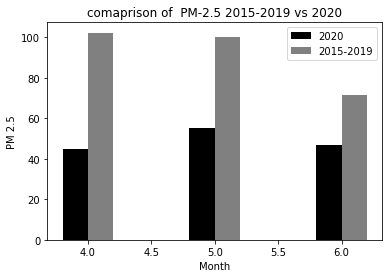

In [20]:
#plotting PM 2.5 2020 vs 2015-2019
hist = Year_2020.groupby('month')['PM2.5'].mean()
hist2 = Year_15_19.groupby('month')['PM2.5'].mean()
bar = plt.bar(hist.index - 0.1, hist, color ='black',width = .2, label = '2020')
bar1 = plt.bar(hist2.index +.1 , hist2, color ='grey',width = .2,label ='2015-2019')
plt.xlabel("Month")
plt.ylabel("PM 2.5")
plt.legend()
plt.title("comaprison of  PM-2.5 2015-2019 vs 2020")
plt.savefig('PM2_5')

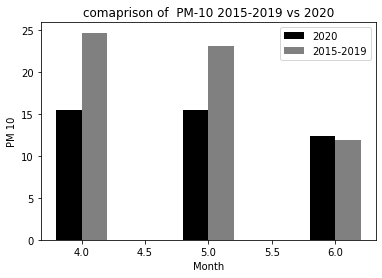

In [21]:
hist = Year_2020.groupby('month')['SO2'].mean()
hist2 = Year_15_19.groupby('month')['SO2'].mean()
bar = plt.bar(hist.index - 0.1, hist, color ='black',width = .2, label = '2020')
bar1 = plt.bar(hist2.index +.1 , hist2, color ='grey',width = .2,label ='2015-2019')
plt.xlabel("Month")
plt.ylabel("PM 10")
plt.legend()
plt.title("comaprison of  PM-10 2015-2019 vs 2020")
plt.savefig('SO2')

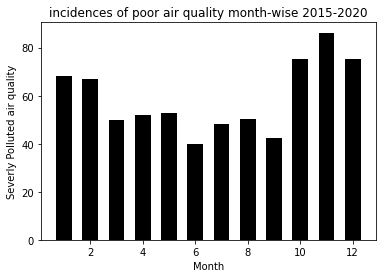

In [22]:
hist2 = df.groupby('month')['NOx'].mean()
#hist['month'] = hist.index
plt.bar(hist2.index, hist2, color ='black',
        width = .6)
plt.xlabel("Month")
plt.ylabel("Severly Polluted air quality")
plt.title("incidences of poor air quality month-wise 2015-2020")
plt.show()

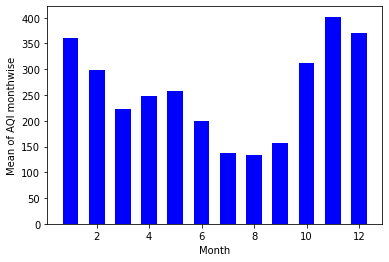

In [23]:
hist2 = df.groupby('month')['AQI'].mean()
#hist['month'] = hist.index
plt.bar(hist2.index, hist2, color ='blue',
        width = .6)
plt.xlabel("Month")
plt.ylabel("Mean of AQI monthwise")
plt.savefig('Mean of AQI monthwise')
plt.show()

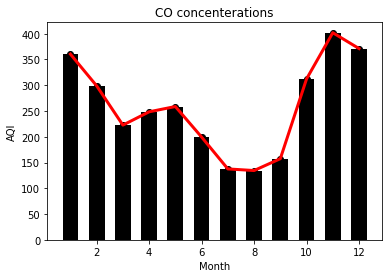

In [24]:
hist2 = df.groupby('month')['AQI'].mean()
plt.bar(hist2.index, hist2, color ='black',
        width = .6)
plt.scatter(hist2.index, hist2, color ='black')
plt.plot(hist2.index, hist2, color ='red',linewidth = 3)
plt.xlabel("Month")
plt.ylabel("AQI")
plt.title("CO concenterations")
plt.show()

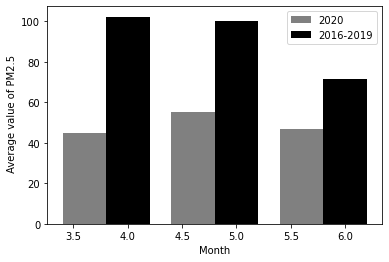

In [25]:
hist2 = Year_2020.groupby('month')['PM2.5'].mean()
hist = Year_15_19.groupby('month')['PM2.5'].mean()
#hist['month'] = hist.index
plt.bar(hist2.index-.4, hist2, color = 'grey',
        width = .4, label = '2020')
plt.bar(hist.index, hist, color ='black',
        width = .4,label = '2016-2019')
plt.xlabel("Month")
plt.ylabel(" Average value of PM2.5")
plt.legend()
plt.show()

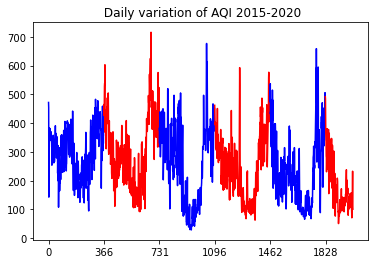

In [26]:
c= []
i= 0
while (i <2100):
    c.append(i)
    i = i + 365.5
df['year'] = df['Date'].dt.year
df
df_2015 = df.loc[(df['year']== 2015)]
df_2016 = df.loc[(df['year']== 2016)]
#df_2016.index = [ i for i in range (0, len(df_2016)) ]
df_2017 = df.loc[(df['year']== 2017)]
#df_2017.index = [ i for i in range (0, len(df_2017)) ]
df_2018 = df.loc[(df['year']== 2018)]
df_2019 = df.loc[(df['year']== 2019)]
df_2020 = df.loc[(df['year']== 2020)]

plt.plot(df_2015.index, df_2015['AQI'], color = 'BLUE' )
plt.plot(df_2016.index, df_2016['AQI'], color = 'RED' )
plt.plot(df_2017.index, df_2017['AQI'], color = 'BLUE' )
plt.plot(df_2018.index, df_2018['AQI'], color = 'RED' )
plt.plot(df_2019.index, df_2019['AQI'], color = 'BLUE' )
plt.plot(df_2020.index, df_2020['AQI'], color = 'RED' )
plt.title(" Daily variation of AQI 2015-2020")
plt.xticks(c)
plt.savefig('variation of AQI daily 2015-2020')



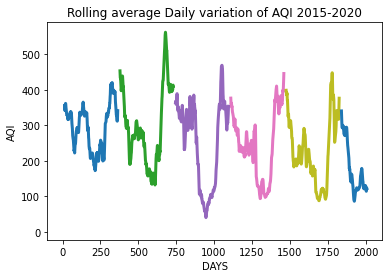

In [27]:
i = 2015
while i <2021:
    df_yearwise =  df.loc[(df['year']== i)]
    #df_yearwise = df_yearwise.reset_index()
    df_rolling = df_yearwise['AQI'].rolling(15).mean()
    plt.plot(df_rolling.index, df_rolling, [i-2010], linewidth = 3)
    i = i +1
plt.title("Rolling average Daily variation of AQI 2015-2020")
plt.ylabel('AQI')
plt.xlabel('DAYS')
plt.savefig('Weighted average Daily variation of AQI 2015-2020')

In [28]:
df_2019['AQI'].std()

117.59775035968282

In [29]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df['AQI'], autolag='AIC')

In [30]:
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}') 

ADF Statistic: -3.4425759824257423
n_lags: 0.009590306551633674
p-value: 0.009590306551633674
Critial Values:
   1%, -3.4336386745240652
Critial Values:
   5%, -2.8629927557359443
Critial Values:
   10%, -2.5675433856598793


In [31]:
c= []
d=[]
s= 0
for i in range(0,31):
    c.append(300)
    if(i%5==0):
     d.append(i)
    
   


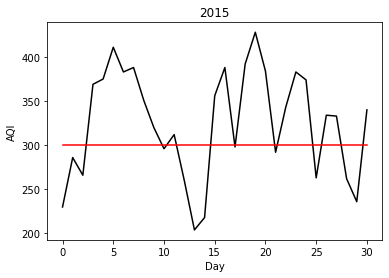

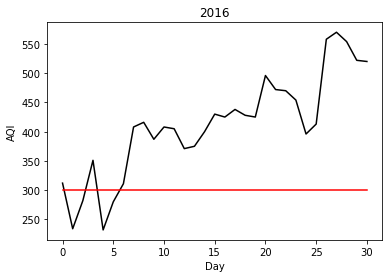

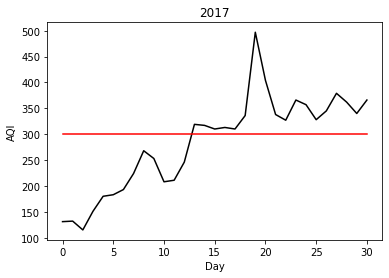

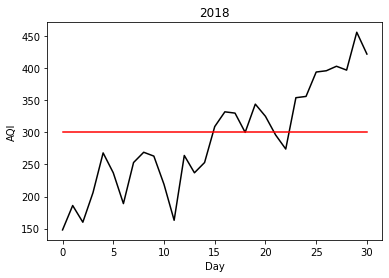

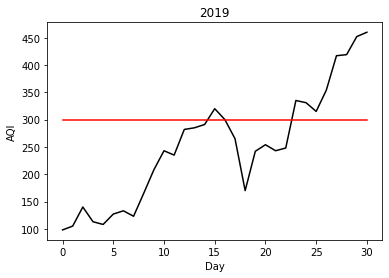

In [32]:
for i in range(2015,2020):
        df_oct = df.loc[((df['month'] == 10))  & (df['Year'] == i)]
        df_oct = df_oct.reset_index()
        plt.plot(df_oct.index, df_oct['AQI'], color = 'black')
        plt.plot(df_oct.index, c, color = 'red')
        plt.xticks(d)
        plt.xlabel('Day')
        plt.ylabel('AQI')
        plt.title(str(i))
        plt.savefig(str(i))
        plt.show()
        

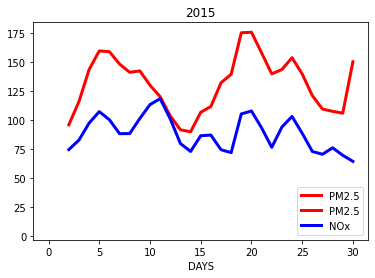

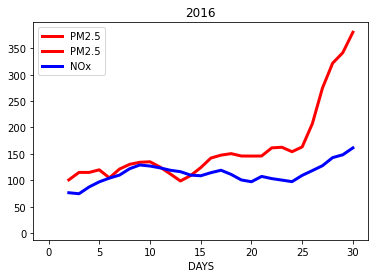

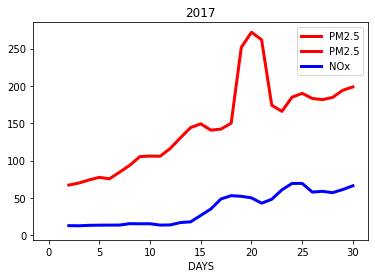

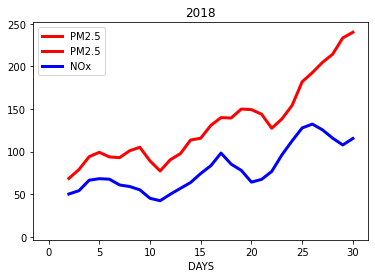

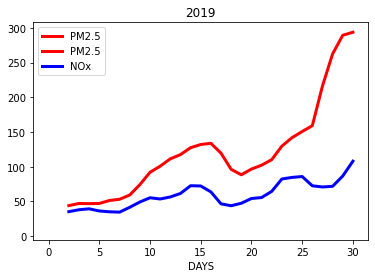

In [33]:
i = 2015
while i <2020:
    df_oct=  df.loc[(df['month']== 10) & (df['year']== i)]
    df_oct = df_oct.reset_index()
    df_rolling = df_oct['PM2.5'].rolling(3).mean()
    df_rolling2 = df_oct['NOx'].rolling(3).mean()
    plt.plot(df_rolling.index, df_rolling, [i-2010], color = 'red' , linewidth = 3, label = 'PM2.5')
    plt.plot(df_rolling2.index, df_rolling2, color = 'blue', linewidth = 3, label = 'NOx')
    plt.title(str(i))

    plt.legend()
    plt.xlabel('DAYS')
    plt.savefig(str(i))
    plt.legend()
    plt.title(str(i))
    plt.show()
    i = i +1
    


#plt.savefig('Weighted average Daily variation of AQI 2015-2020')
            
        
        
        
        

In [34]:
df_oct=  df.loc[(df['month']== 10)]
df_oct = df_oct.reset_index()
list = df_oct.columns
oct = df_oct.values
list



Index(['index', 'City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3',
       'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket',
       'month', 'Year', 'day', 'year'],
      dtype='object')

In [35]:
d = []


for j in range(3,16):
 c =[]
 s = 0
 i= 0
 while i <155:
    s = 100*(oct[i+30,j]- oct[i,j])/(oct[i,j])
    c.append(s)
    i+=31
 d.append(c)
    

    
  


In [36]:
d
dff = pd.DataFrame(d)

In [37]:
i =0 
c= []
while i <155:
    s = 100*(oct[i+25,7]- oct[i,7])/(oct[i,7])
    c.append(s)
    i+=31
print(c)

[-17.676359719978464, 34.63117027176927, 331.1732605729877, 180.44528460407483, 212.30940870211975]


In [38]:
list[3:15]

Index(['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3',
       'Benzene', 'Toluene', 'Xylene'],
      dtype='object')

In [39]:
e = []
for l in range(0,155,31):
  oct_yr = oct[l:l+31]
  d =[]
  for k in range(3,15):
    s = 0
    c =[]
    for i in range(0,len(oct_yr)-5):
        for j in range(i,i+5):
            s = s + oct_yr[j,k]
        s = s/5
        c.append(s)
      
        s = 0
    d.append(c)
  e.append(d)

In [40]:
arr = np.array(e)

In [41]:
arr.shape


(5, 12, 26)

In [42]:
arr[0,0,25]-arr[0,0,0]

-16.314000000000007

In [43]:
d =[]
for j in range(0,12):
    c =[]
    for i in range(0,5):
        s = 100*(arr[i,j,25]- arr[i,j,0])/(arr[i,j,0])
        c.append(s)
    d.append(c)

        

In [44]:
d =np.array(d)
d.shape

(12, 5)

In [45]:
d[[0,1,4,7]]


array([[-13.29822788, 181.41343926, 162.5286122 , 161.8338447 ,
        466.49426894],
       [-23.81125511, 134.59634157, 137.74109416,  97.72964285,
        259.90329145],
       [-21.53520067,  63.99640177, 352.19298246, 104.65695473,
        132.95916065],
       [ 59.36923077, 109.417369  , 240.11708949,  29.37142857,
         59.22330097]])

In [46]:
dff = pd.DataFrame(d[[0,1,4,7]])
dff['pollutants'] = list[[3,4,7,10]]

In [47]:
dff.to_excel('Rolling average change %.xlsx')